First guess at a and b are  2.0 1.0
First loss function is  500.15
Best a and b are  0.9390198950485866 0.47419724324276397
Best loss function is  1.3416095642628225


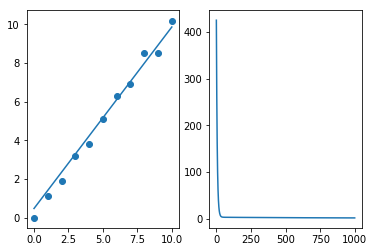

In [11]:
# Import required python packages for calculating and graphing
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

# Define a function that takes three inputs and returns value in standard linear form i.e. y = mx + b 
def linear(x,a,b):
    return a*x+b

# Define a function that takes four inputs (a, b, x and observed y data), generates a linear equation as the y_model function based on a, b, and x and then
# returns the sum of the squared residuals i.e. sum of (the y_model data generated minus the observed y data input) squared
def loss(x,y_obs,a,b):
    y_model = linear(x,a,b)
    return np.sum( (y_model-y_obs)**2 )

# Create the array of x data and the corresponding array of observed y data
x = np.array( [0,1,2,3,4,5,6,7,8,9,10] )
y_obs = np.array( [0,1.1,1.9,3.2,3.8,5.1,6.3,6.9,8.5,8.5,10.2] )

# Set the values for a and b as constants
a,b = 2.0, 1.0

# Define y_model as the linear function (defined above) performed on inputs x, a and b (defined above).  Result will be an array of y_model data.
y_model = linear(x,a,b)

# Print to screen the constant values for a and b and then print the value of the loss function defined above = which is the sum of the
# squared residuals between the predicted y and observed y.  The closer the SSR is to 0, the better model you have
print('First guess at a and b are ',a,b)
print('First loss function is ',loss(x,y_obs,a,b))

# Now let's improve the model.
# Define gradient with respect to a value as the partial derivative of the loss function (SSR) with respect to the a value
d_by_da = grad(loss,2)
# Define gradient with respect to b value as the partial derivative of the loss function (SSR) with respect to the b value
d_by_db = grad(loss,3)

# Set the learning rate - which is how much to move from the original value to predict the next value
learning_rate = 0.0001
# Set the number of iterations to perform in search of the local minimum; could alternatively set a precision setting here.
maximum_number_of_iterations = 1000

# Create an empty array
ssr = []

#Loop through the number of interations specified above (1000) to calculate the best a and b values for the model.
for iter in range(maximum_number_of_iterations):
    a -= learning_rate*d_by_da(x,y_obs,a,b)  # calculate a new a as the prior a minus the learning rate times the gradiant of the prior a
    b -= learning_rate*d_by_db(x,y_obs,a,b)  # calculate b as the prior b minus the learning rate times the gradient of the prior b
    y_model = linear(x,a,b)                  # generate the new predicted y values based on the new a and b
    ssr.append(loss(x,y_obs,a,b))            # append to the SSR array, the new value of the loss function based on the new a and b
    
# Print to screen the results of the iteration above - so the new a, b and loss function
print('Best a and b are ',a,b)
print('Best loss function is ',loss(x,y_obs,a,b))

# Put 1 row of 2 plots on the screen.  This is the first of the 2 plots.  It is a scatterplot of the x values with the observed y values. 
# Also put on the same plot the x values with the predicted y values (the model line we generated)
plt.subplot(1,2,1)
plt.scatter(x,y_obs)
plt.plot(x,y_model)

# This is the second of the two plots.  Plot the values in the ssr array.  This shows how quickly the SSR was minimized over the 1000 iterations.
plt.subplot(1,2,2)
plt.plot(ssr)

#Display the 2 plots on the screen.
plt.show()


# Great website explaining gradient descent

https://www.kdnuggets.com/2017/04/simple-understand-gradient-descent-algorithm.html